In [4]:
import sklearn as sk
from pyDeepInsight import ImageTransformer, LogScaler
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from pyDeepInsight import ImageTransformer, LogScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from keras import backend as K
import tensorflow as tf

In [5]:
data = pd.read_csv('./all-cleaned-for-t2i/all-cleaned-for-t2i.csv', low_memory=False, header=0, index_col='Index')

In [6]:
len(data.columns)

64

In [7]:
data = data.select_dtypes(exclude=object)

In [11]:
data.columns

Index(['Protocol', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s',
       'Bwd Packets/s', 'Packet Length Min', 'Packet Length Max',
       'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance',
       'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count',
       'ACK Flag Count', 'Down/Up Ratio

### Normalize The data

In [14]:
distance_metric = 'cosine'
reducer = TSNE(
    n_components=2,
    metric=distance_metric,
    square_distances=True,
    n_jobs=-1
)

In [15]:
ln=LogScaler()
data = ln.fit_transform(data)
#X_train_norm = ln.fit_transform(X_train)
#X_test_norm = ln.transform(X_test)

other normalization techniques

In [ ]:
#normalized_df=(data-data.mean())/data.std()
#data =(data-data.min())/(data.max()-data.min())

In [16]:
pixel_size = (28,28)
it = ImageTransformer(
    feature_extractor=reducer, 
    pixels=pixel_size)

In [19]:
data.loc[:, (data != 0).any(axis=0)]

,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,Subflow Fwd Bytes,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Idle Mean,Idle Std,Idle Max,Idle Min
Index,,,,,,,,,,,,,,,,,,,,,
0-audio-streaming,0.362977,0.282867,0.000000,0.300961,0.000000,0.453726,0.000000,0.526398,0.541772,0.000000,...,0.538015,0.000000,0.614230,0.000000,0.083464,0.939996,0.000000,0.000000,0.000000,0.000000
1-audio-streaming,0.479479,0.233841,0.085814,0.266251,0.417204,0.449322,0.611713,0.596595,0.000000,0.708776,...,0.521016,0.822793,0.000000,0.000000,0.000000,0.657370,0.000000,0.000000,0.000000,0.000000
2-audio-streaming,0.479836,0.233841,0.085814,0.250110,0.368761,0.423605,0.578416,0.562472,0.000000,0.633196,...,0.486417,0.727387,0.000000,0.000000,0.000000,0.657370,0.000000,0.000000,0.000000,0.000000
3-audio-streaming,0.997735,0.728413,0.748874,0.777713,0.842680,0.740855,0.000000,0.764341,0.843028,0.802134,...,0.677112,0.953036,1.000000,1.000000,0.634053,0.847827,0.999948,0.586786,0.999948,0.999948
4-audio-streaming,0.998664,0.423183,0.368947,0.505809,0.564526,0.757955,0.000000,0.717388,0.855248,0.796909,...,0.640074,0.761729,0.946438,0.624413,0.270277,0.939996,0.999557,0.580042,0.999557,0.999557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239995-voip,0.999999,0.808359,0.789794,0.785587,0.834191,0.762814,0.000000,0.763029,0.877331,0.794785,...,0.710209,0.814572,1.000000,1.000000,0.676917,0.847827,0.999683,0.587038,0.999683,0.999683
239996-voip,0.999999,0.825900,0.823101,0.764180,0.774138,0.511276,0.691228,0.672836,0.000000,0.539823,...,0.602648,0.606306,0.000000,0.000000,0.805216,0.657370,0.999604,0.587083,0.999604,0.999604
239997-voip,0.999997,0.791068,0.801363,0.819148,0.805775,0.765078,0.000000,0.873295,0.802139,0.801955,...,0.803786,0.745881,1.000000,1.000000,0.758149,0.847827,0.999686,0.587082,0.999686,0.999686


In [18]:
data = data.dropna(axis=1, how = 'all')

In [20]:
data.dropna(inplace=True)


In [22]:
data.isna().sum().sum()


0

### Train Image Transformer

it.fit does not work with na, but might lose valuable data?

/home/nalex/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/nalex/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


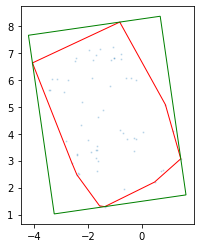

In [23]:
it.fit(data, plot=True)
image_data = it.transform(data)

#data.dropna(inplace=True)
#X_train_img = it.transform(X_train_norm)
#X_test_img = it.transform(X_test_norm)

#### Visualize Images and Image Transformer

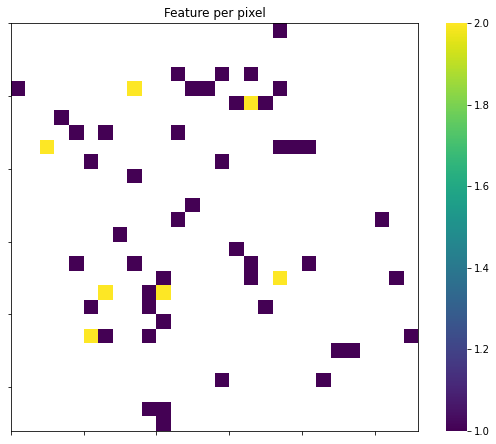

In [29]:
fdm = it.feature_density_matrix()
fdm[fdm == 0] = np.nan

plt.figure(figsize=(10, 7.5))

ax = sns.heatmap(fdm, cmap="viridis", linewidths=0., 
                 linecolor="lightgrey", square=True)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
for _, spine in ax.spines.items():
    spine.set_visible(True)
_ = plt.title("Feature per pixel")

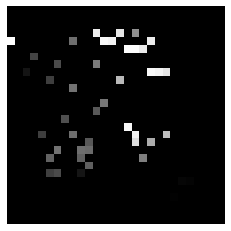

In [30]:
fig, ax = plt.subplots()
ax.axis('off')
ax.imshow(image_data[70000])

In [31]:
len(data)

240000

### Save Images

In [32]:
from PIL import Image
import PIL as PIL
import torch
import torchvision.transforms as T

In [33]:
def tensor_to_image(tensor):
    tensor = tensor*255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor)>3:
        assert tensor.shape[0] == 1
        tensor = tensor[0]
    return PIL.Image.fromarray(tensor)

In [37]:
img = tensor_to_image(image_data[60000])
img

In [19]:
image_folder = "darknet_data"
for i in range(0, len(image_data)):
    #image = Image.fromarray(image_data[i])
    image = tensor_to_image(image_data[i])
    image.save(image_folder + '/' + str(data.index[i]) + '_image.png')